# alphANTs

This notebook follows [ANTs beginner tutorial](https://github.com/stnava/alphANTs). The idea is to implement the same example using nipype interface to ANTs

## 1. Clone example repository

In [1]:
!git clone https://github.com/stnava/alphANTs.git alphANTs

Cloning into 'alphANTs'...
remote: Counting objects: 26, done.
remote: Total 26 (delta 0), reused 0 (delta 0), pack-reused 26
Unpacking objects: 100% (26/26), done.


## 2. Plot input images

We will load images as numpy arrays and plot them using matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
plt.rcParams['figure.figsize'] = [10, 10]

In [3]:
r16slice = mpimg.imread('alphANTs/data/r16slice.jpg')
r64slice = mpimg.imread('alphANTs/data/r64slice.jpg')

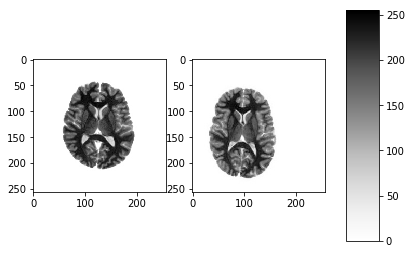

In [4]:
plt.subplot(121)
imgplot_r16slice = plt.imshow(r16slice, cmap='Greys')
plt.subplot(122)
imgplot_r64slice = plt.imshow(r64slice, cmap='Greys')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## 3. Import nipype interface, build a rigid registration and register r64slice to r16slice

In [5]:
from nipype.interfaces.ants import RegistrationSynQuick

180515-17:10:49,483 duecredit ERROR:
	 Failed to import duecredit due to No module named 'duecredit'


In [ ]:
# rigid registration
# antsRegistrationSyNQuick.sh -d 2 -f data/r16slice.jpg -m data/r64slice.jpg -t r -o ./output/rigid
rigid = RegistrationSynQuick()
rigid.inputs.dimension = 2 # -d 3
rigid.inputs.fixed_image = 'alphANTs/data/r16slice.jpg' # -f data/r16slice.jpg
rigid.inputs.moving_image = 'alphANTs/data/r64slice.jpg' # -m data/r64slice.jpg
rigid.inputs.transform_type = 'r' # -t r
rigid.inputs.output_prefix = './alphANTs/output/rigid' # -o ./output/rigid
rigid_result = rigid.run()

Take a look at the output folder

In [7]:
!ls alphANTs/output/

README                    rigidInverseWarped.nii.gz
rigid0GenericAffine.mat   rigidWarped.nii.gz


Results are in __nifti__ format. Thus, import _nibabel_ package, use it to load the warped image and plot it.

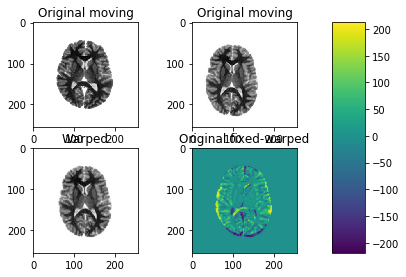

In [8]:
import nibabel as nib
rigidWarped = nib.load('alphANTs/output/rigidWarped.nii.gz')

plt.subplot(221)
imgplot_r16slice_rigid = plt.imshow(r16slice, cmap='Greys')
plt.title('Original moving')
plt.subplot(222)
imgplot_r64slice_rigid = plt.imshow(r64slice, cmap='Greys')
plt.title('Original moving')
plt.subplot(223)
imgplot_rigidWarped = plt.imshow(rigidWarped.get_data().T, cmap='Greys')
plt.title('Warped')
plt.subplot(224)
imgplot_rigidDifference = plt.imshow(r16slice-rigidWarped.get_data().T, cmap='viridis')
plt.title('Original fixed-warped')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## 4. Import nipype interface, build an affine registration and register r64slice to r16slice

In [ ]:
# affine registration
# antsRegistrationSyNQuick.sh -d 2 -f data/r16slice.jpg -m data/r64slice.jpg -t a -o ./output/affine
affine = RegistrationSynQuick()
affine.inputs.dimension = 2 # -d 3
affine.inputs.fixed_image = 'alphANTs/data/r16slice.jpg' # -f data/r16slice.jpg
affine.inputs.moving_image = 'alphANTs/data/r64slice.jpg' # -m data/r64slice.jpg
affine.inputs.transform_type = 'a' # -t a
affine.inputs.output_prefix = './alphANTs/output/affine' # -o ./output/affine
affine_result = affine.run()

Take a look at the output folder:

In [10]:
!ls alphANTs/output/

README                     rigid0GenericAffine.mat
affine0GenericAffine.mat   rigidInverseWarped.nii.gz
affineInverseWarped.nii.gz rigidWarped.nii.gz
affineWarped.nii.gz


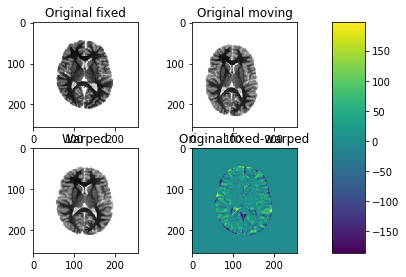

In [11]:
affineWarped = nib.load('alphANTs/output/affineWarped.nii.gz')

plt.subplot(221)
imgplot_r16slice_affine = plt.imshow(r16slice, cmap='Greys')
plt.title('Original fixed')
plt.subplot(222)
imgplot_r64slice_affine = plt.imshow(r64slice, cmap='Greys')
plt.title('Original moving')
plt.subplot(223)
imgplot_affineWarped = plt.imshow(affineWarped.get_data().T, cmap='Greys')
plt.title('Warped')
plt.subplot(224)
imgplot_affineDifference = plt.imshow(r16slice-affineWarped.get_data().T, cmap='viridis')
plt.title('Original fixed-warped')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## 5. Import nipype interface, build an 'syn' registration and register r64slice to r16slice

In [ ]:
# syn registration
# antsRegistrationSyNQuick.sh -d 2 -f data/r16slice.jpg -m data/r64slice.jpg -t s -o ./output/syn
syn = RegistrationSynQuick()
syn.inputs.dimension = 2 # -d 3
syn.inputs.fixed_image = 'alphANTs/data/r16slice.jpg' # -f data/r16slice.jpg
syn.inputs.moving_image = 'alphANTs/data/r64slice.jpg' # -m data/r64slice.jpg
syn.inputs.transform_type = 's' # -t a
syn.inputs.output_prefix = './alphANTs/output/syn' # -o ./output/syn
syn_result = syn.run()

Take a look at the output folder:

In [13]:
!ls alphANTs/output/

README                     rigidWarped.nii.gz
affine0GenericAffine.mat   syn0GenericAffine.mat
affineInverseWarped.nii.gz syn1InverseWarp.nii.gz
affineWarped.nii.gz        syn1Warp.nii.gz
rigid0GenericAffine.mat    synInverseWarped.nii.gz
rigidInverseWarped.nii.gz  synWarped.nii.gz


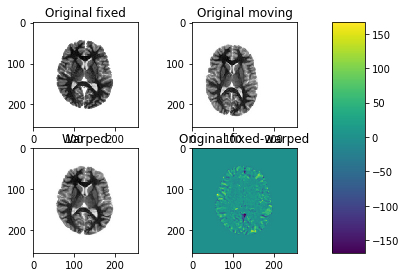

In [14]:
synWarped = nib.load('alphANTs/output/synWarped.nii.gz')

plt.subplot(221)
imgplot_r16slice_syn = plt.imshow(r16slice, cmap='Greys')
plt.title('Original fixed')
plt.subplot(222)
imgplot_r64slice_syn = plt.imshow(r64slice, cmap='Greys')
plt.title('Original moving')
plt.subplot(223)
imgplot_synWarped = plt.imshow(synWarped.get_data().T, cmap='Greys')
plt.title('Warped')
plt.subplot(224)
imgplot_synDifference = plt.imshow(r16slice-synWarped.get_data().T, cmap='viridis')
plt.title('Original fixed-warped')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()